# Seaborn visualization tutorial

## Following things are visualized in this notebook

* Univariate continuous distributions
* Multivariate continuous distribution
* Categorical distributions

## Important functions and their use

### For continuous variables

1. distplot: plots single continuous variable
2. jointplot : plots 2 continuous variables
3. pairplot : pairs every variable(scatterplot matrix)

### For categorical + continuous variables

1. countplot: histogram , Frequency distribution of single variable
2. countplot: 'hue' parameter can be used to add one more variable and create stacked bars
3. swarmplot: plot 1 cat and 1 cont variables
4. swarmplot: plot 2 cat and 1 cont variables using hue
5. boxplot: plots 2 cat and 1 cont variable
6. barplot: 2 cat and 1 cont
7. factorplot: plot 4 variables at a time; can recreate above plots using 'kind' parameter

### For plotting linear relationships in variables

1. regplot : less commonly used
2. lmplot : requires 'tidy' data
  * Parameters:
    * order: to set higher order poly functions
    * hue, row, col: to add additional features
    * size: to control size of individual plots
    * kind: used in other plots to put linear relationship
    * robust: used to ignore outliers
    * markers and palette: to control visual features

In [11]:
%matplotlib inline

import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes = True)
np.random.seed(sum(map(ord, "distributions")))


# Plotting continuous univariate distributions: distplot

C:\Users\Amit\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


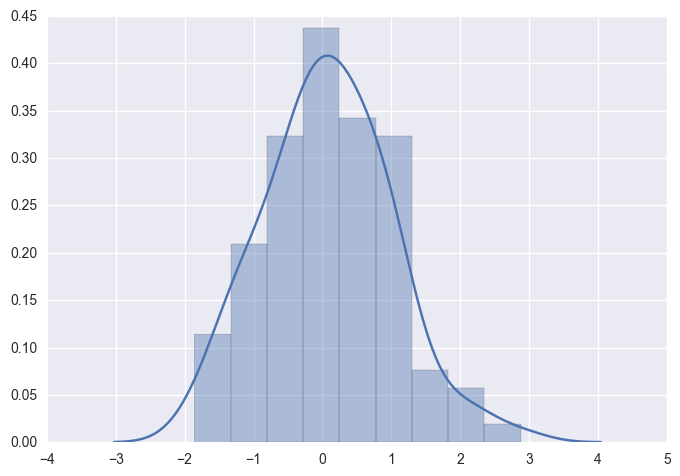

In [12]:
# Distplot function

x = np.random.normal(size=100)

sns.distplot(x)

# Continuous Bivariate distributions: Scatterplot(Jointplot)

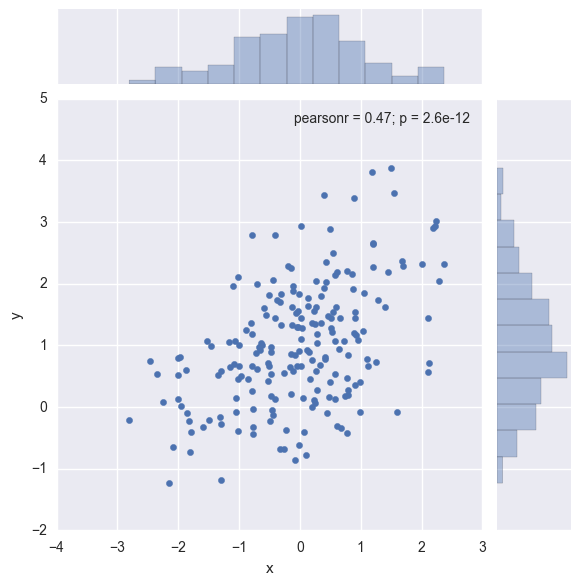

In [6]:
#Scatterplot


mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])


sns.jointplot(x ='x', y ='y', data=df)

# Visualizing pariwise relationship in data: Scatterplot Matrix (pairplot)

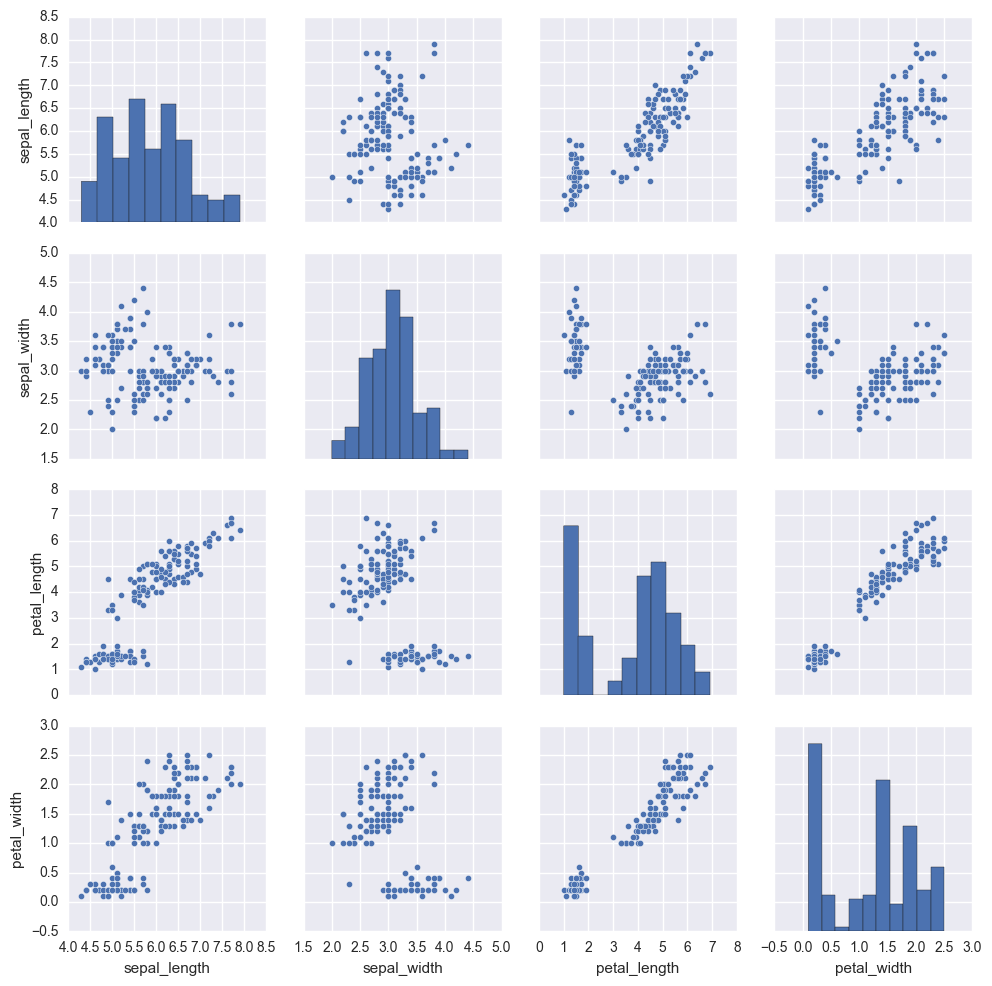

In [8]:
iris = sns.load_dataset(name='iris')

sns.pairplot(iris)

# Categorical Data

In [13]:
sns.set_style(style='whitegrid')


np.random.seed(sum(map(ord,'categorical')))

titanic = sns.load_dataset('titanic')
tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')



## Two variables : one categorical , one continuous

### Use swarmplot

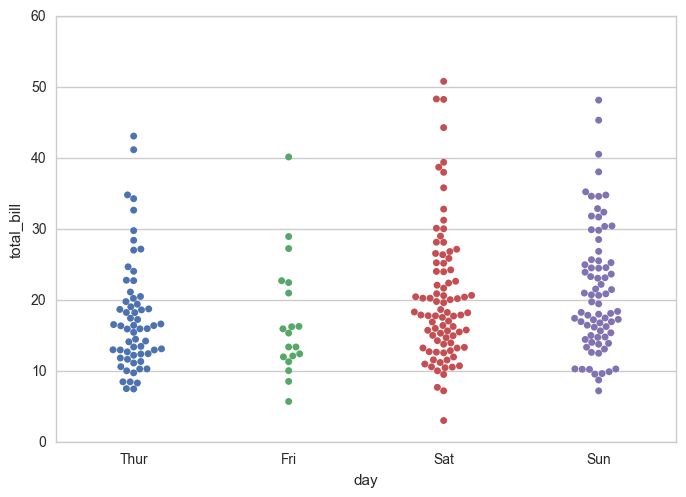

In [14]:
sns.swarmplot(x='day',y='total_bill', data=tips)

## Three variables 2 categorical , 1 continuous

### Another categorical variable can be displayed using hue

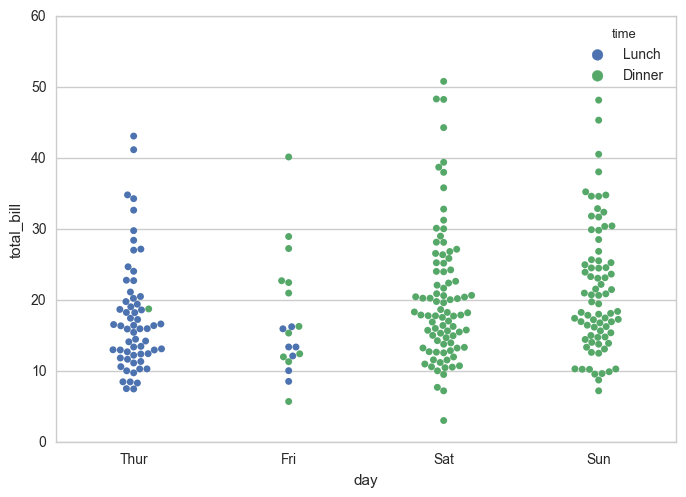

In [28]:
sns.swarmplot(x ='day', y ='total_bill', hue='time', data=tips)


# Above graphs provide relationships between multiple variables

## Now we will understand the distribution of values within each category


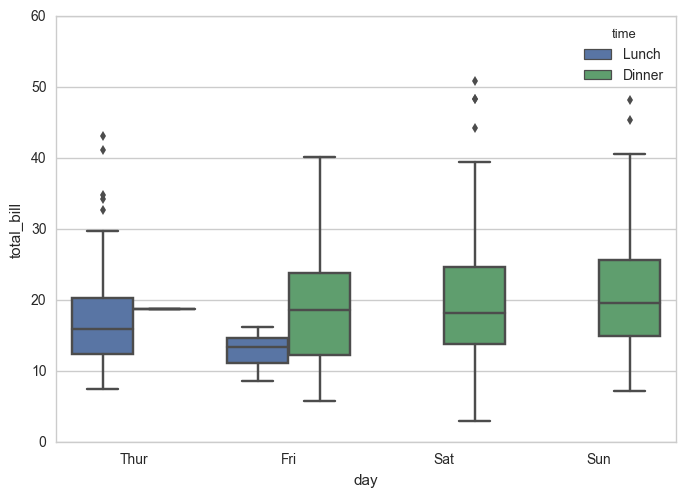

In [29]:
sns.boxplot(x='day',y='total_bill', hue='time', data =tips)

# Barplots

### computes estimate and confidence interval

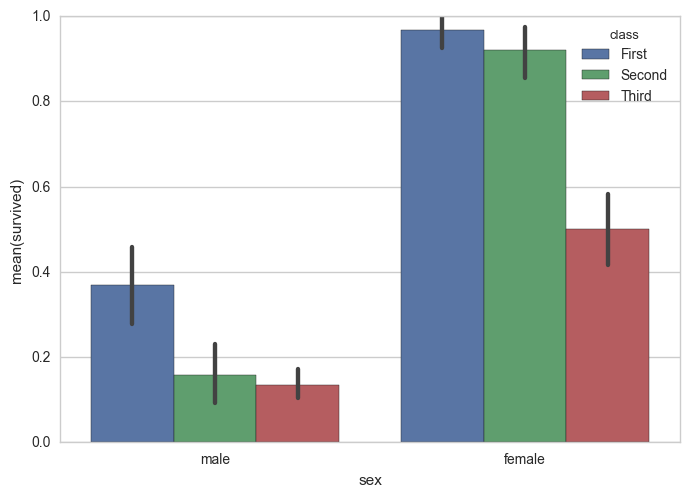

In [35]:
sns.barplot(x='sex', y='survived', hue='class', data=titanic)

## Simple histogram of single variable

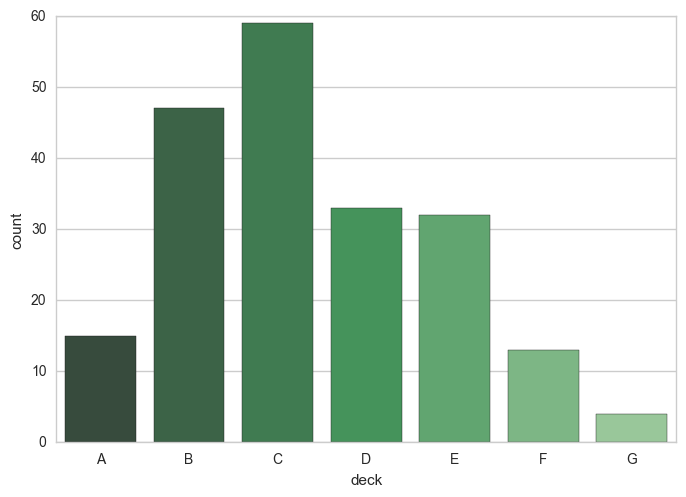

In [40]:

sns.countplot(x= 'deck',data=titanic, palette='Greens_d' )

## Stacked histogram with nested categorical variable

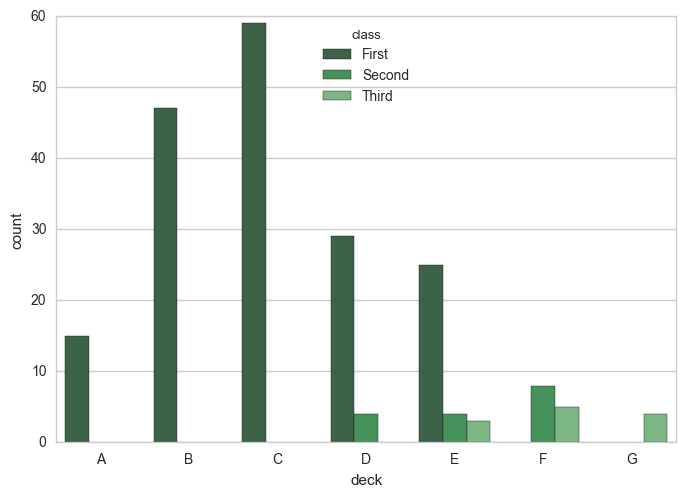

In [41]:
sns.countplot(x='deck', hue='class', data= titanic, palette='Greens_d')

## When all the variables are continuous, boxplot can directly take the whole dataset as input without specifying the axis variables

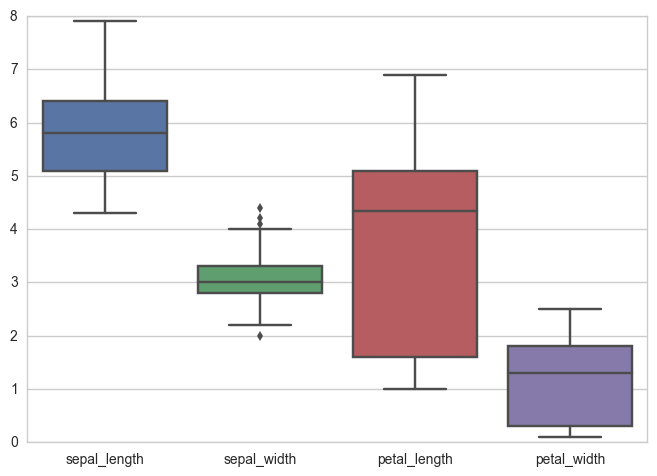

In [53]:

sns.boxplot(data=iris)

### Factorplot , along with the attribute kind, can produce all these above plots for categorical variables

#### similar example like barplot above with factor plot

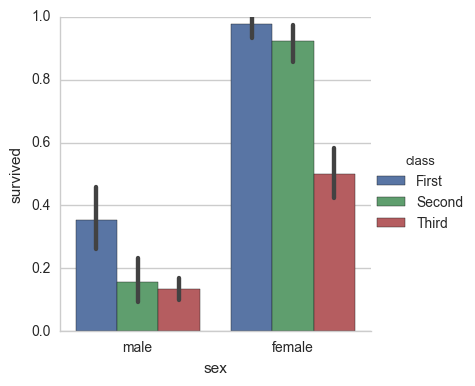

In [57]:


sns.factorplot(x='sex', y='survived',hue='class',data= titanic, kind='bar')

### Factorplots can use another variable called col that adds a total of 4 features to the visualization

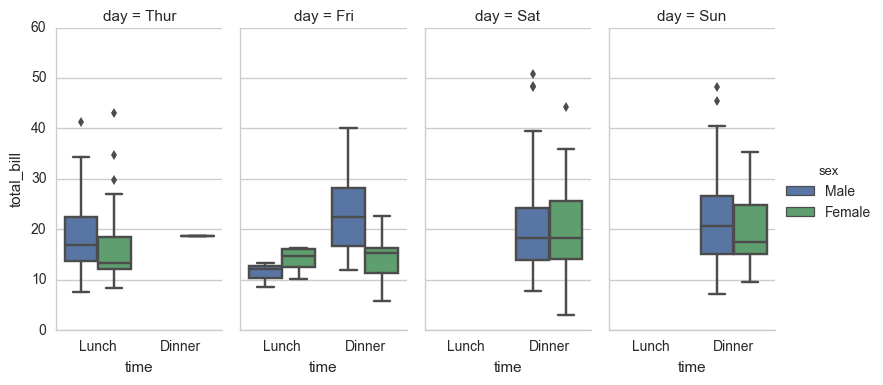

In [67]:
sns.factorplot(x='time', y='total_bill', hue='sex', col='day', data=tips, kind='box', size=4, aspect=0.5)

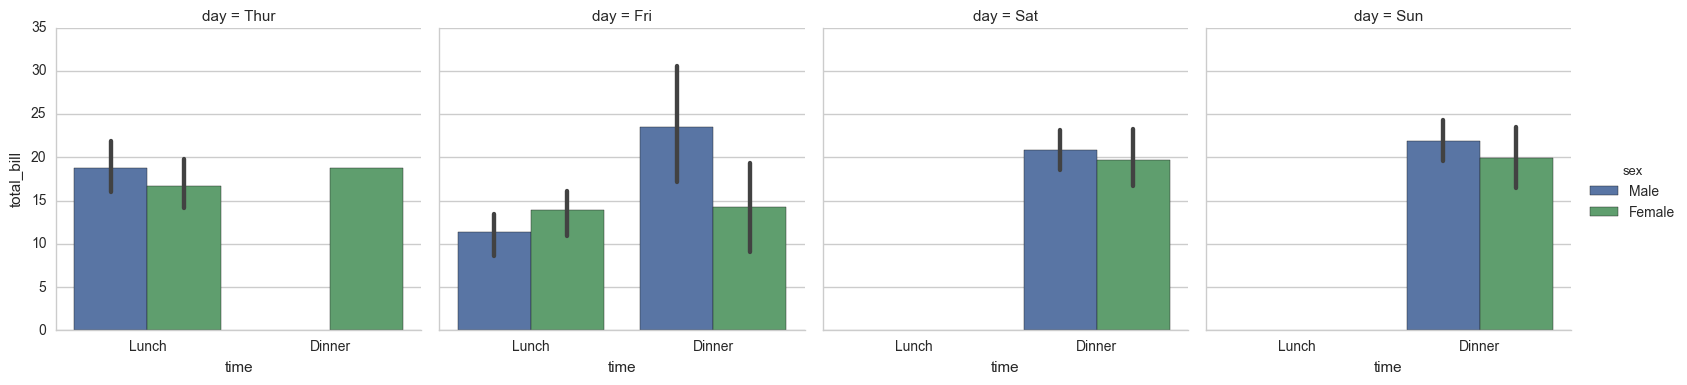

In [68]:
sns.factorplot(x='time', y='total_bill', hue='sex', col='day', data=tips, kind='bar')

# Visualizing linear relationships


### Draw a scatterplot and fit a regression line: regplot / lmplot

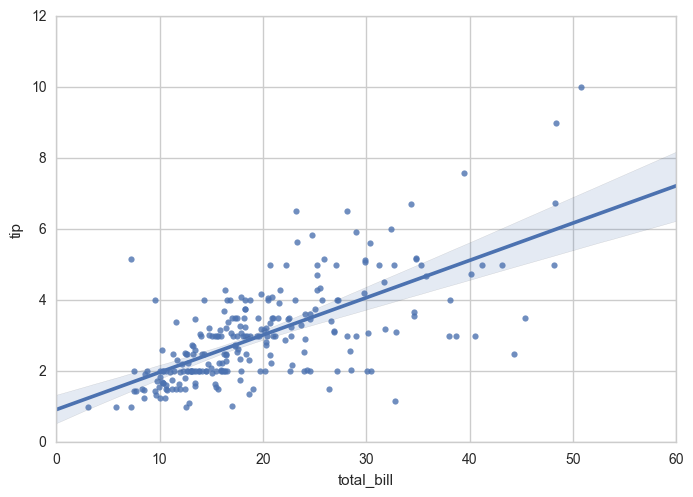

In [75]:

# When both the features are continuous
sns.regplot(x='total_bill', y='tip', data=tips)

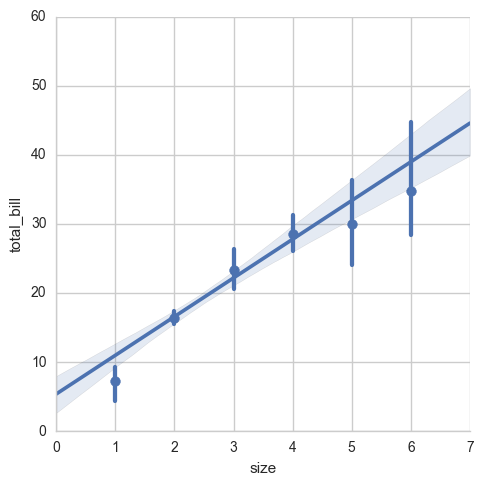

In [79]:
# When one of the features is categorical and other continuous

# Vertical line gives the confidence interval on the variable

sns.lmplot(x='size', y='total_bill', data=tips, x_estimator=np.mean)

# Non linear relationships

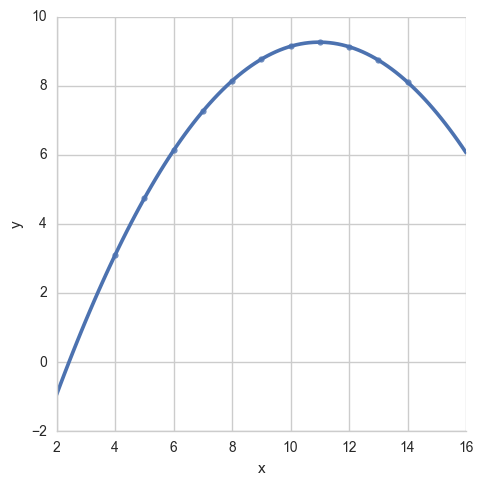

In [89]:
anscombe = sns.load_dataset("anscombe")

# order parameter defines the order of the polynomial
sns.lmplot(x='x',y='y', data = anscombe.query("dataset=='II'"), order=2)

### Adding third  and fourth  and fifth variable to the analysis using 'hue' , 'row' and  'col' parameters

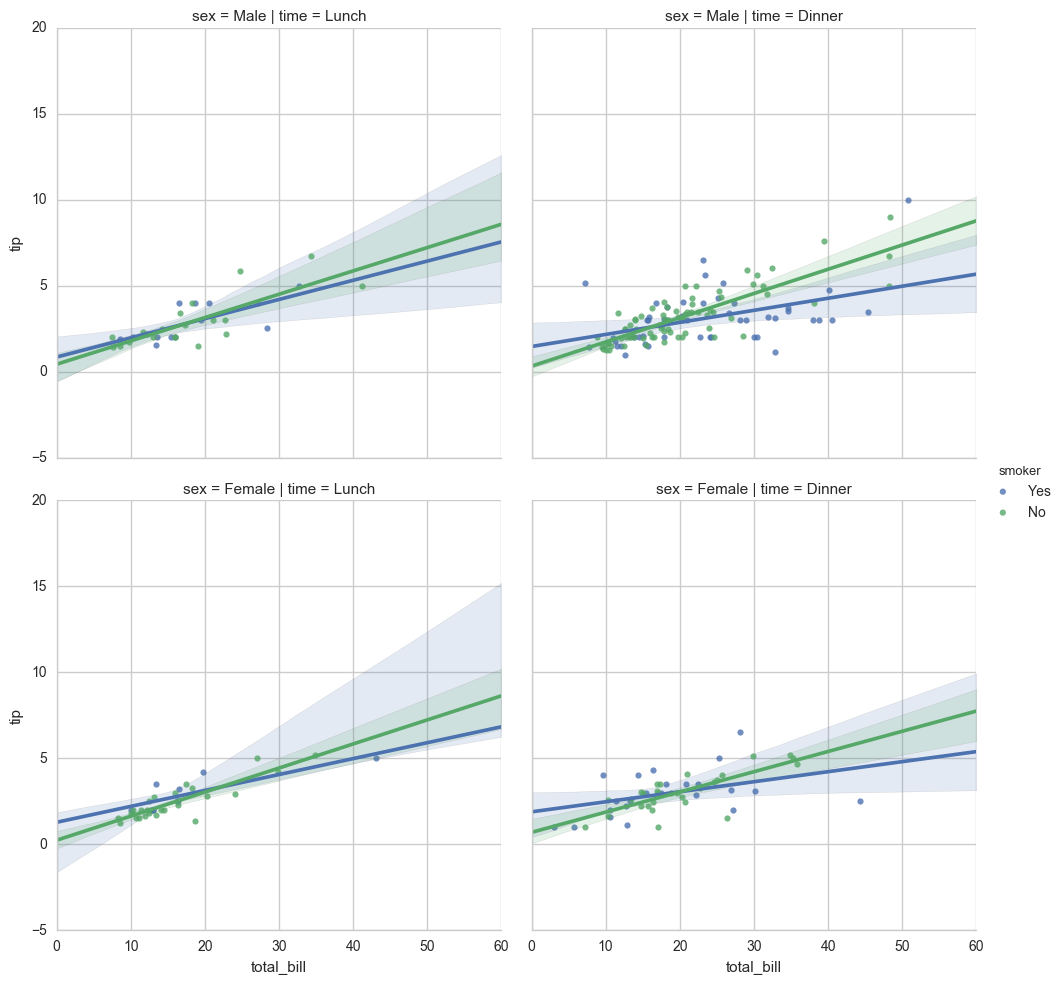

In [95]:
sns.lmplot(x='total_bill',y='tip', row='sex',hue='smoker',col='time',data=tips)

### Add some new markers and palettes using 'markers' and 'palette' and control size using 'size'

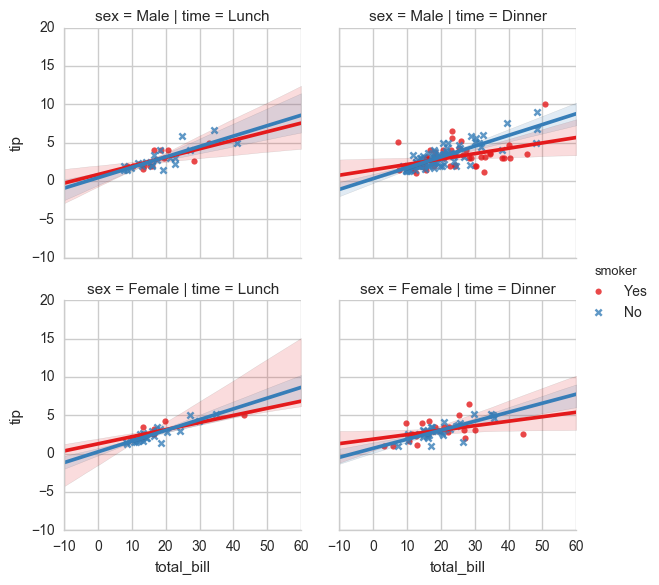

In [99]:
sns.lmplot(x='total_bill',y='tip', 
           row='sex',hue='smoker',col='time',
           data=tips, 
           markers=["o","x"],palette="Set1",
           size=3)

## Plotting regression in another context

C:\Users\Amit\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


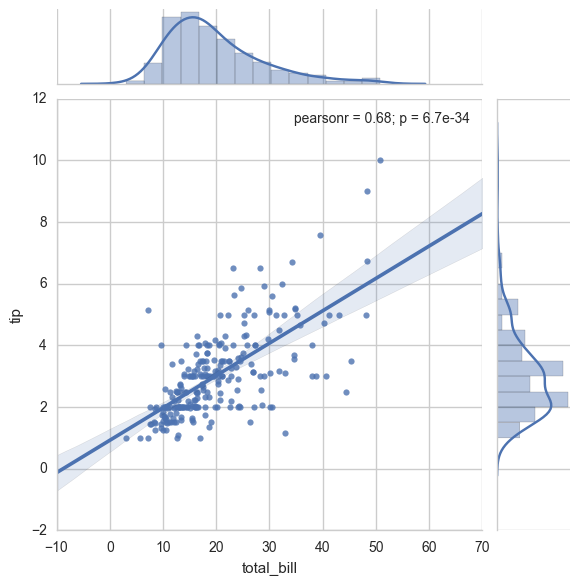

In [100]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg");